Code source: https://realpython.com/knn-python/#a-step-by-step-knn-from-scratch-in-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
abalone = pd.read_csv(url, header=None)

In [3]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [4]:
abalone = abalone.drop("Sex", axis=1)

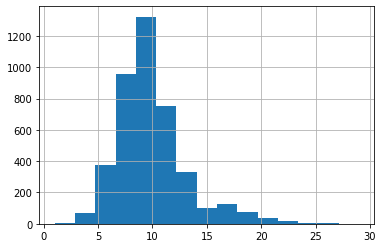

In [5]:
abalone["Rings"].hist(bins=15)
plt.show()

In [6]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

### Computing the norm of the difference vector

In [7]:
import numpy as np

a = np.array([0, 0])
b = np.array([4, 3])

a - b  # [-4, -3]

np.linalg.norm(a - b)

5.0

### Finding the k-nearest neighbors

In [8]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [9]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

In [10]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [11]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

In [12]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings


array([ 9, 11, 10])

As a rule of thumb, use the average for regression models and the mode for classification models.

### With Scikit-Learn

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [15]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [17]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

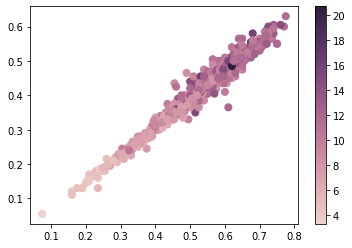

In [18]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

### To find the ideal number of neighbors (empirically)

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [20]:
gridsearch.best_params_

{'n_neighbors': 25}